In [ ]:
#import library yang dibutuhkan
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
import itertools
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

**SKENARIO 1**


In [ ]:
#read file skenario 1
skenario_1 = pd.read_csv('skenario_1.csv')
skenario_1.columns = ['id', 'VH', 'VV', 'Class']
#skenario_1 = skenario_1.drop(["Unnamed: 0"], axis=1)
skenario_1.head()

In [ ]:
#79% bawang putih = 0, non bawang putih =1

def buat_kategori(value):
    if value == "Bawang Putih" :
        val = 0
    else:
        val = 1
    return val

for j in skenario_1.index:
      skenario_1.at[j, 'Class1'] = buat_kategori(skenario_1.at[j, 'Class'])
skenario_1 = skenario_1.drop(["id"], axis=1)
skenario_1 = skenario_1.drop(["Class"], axis=1)

In [ ]:
#factorized class menjadi 0 dan 1

#skenario_1['Class'],_ = pd.factorize(skenario_1['Class'])
#skenario_1 = skenario_1.drop(["id"], axis=1)

In [ ]:
skenario_1

In [ ]:
#pemodelan random forest
#Memisahkan atribut class

Class = skenario_1.Class1
skenario_1.drop(['Class'], axis = 1, inplace = True)

In [ ]:
# Membagi data menjadi Training set and Test set (90:10)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(skenario_1, Class, test_size = 0.1, stratify=Class, random_state = 123)

In [ ]:
Y_test

MENGECEK RANGE PARAMETER DENGAN VALIDATION CURVE

In [ ]:
#menentukan range parameter dengan validation curve

from sklearn.model_selection import validation_curve
num_est= [500, 600, 700, 800, 900, 1000, 1100]

train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = Y_train, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 10)
param_range= [500, 600, 700, 800, 900, 1000, 1100]
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
random_grid = {"min_samples_split": [3, 4],
              "min_samples_leaf": [1, 2],
              "max_depth": [3, 4, 5],
              "n_estimators" : [600, 700],
              "max_features":['sqrt']}

In [ ]:
#MENENTUKAN BEST PARAMETER dengan grid search

import time
start = time.time()

classifier_bp = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train, Y_train)
#Mengambil parameter RF
optimised_random = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred = classifier_bp.predict(X_test)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest grid search:{} detik".format(elapsed_time))

In [ ]:
#MENENTUKAN BEST PARAMETER dengan random sarch
#dikarenakan waktu pemrosesan grid search lama

import time
start = time.time()


classifier_bp = RandomizedSearchCV(estimator=RandomForestClassifier(),
                    param_distributions=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train, Y_train)
#Mengambil parameter RF
optimised_random = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred = classifier_bp.predict(X_test)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest random search:{} detik".format(elapsed_time))

Waktu Training random forest random search:227.77625584602356 detik


In [ ]:
#classification_report
Y_true = Y_test
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.81       420
         1.0       0.87      0.67      0.76       420

    accuracy                           0.79       840
   macro avg       0.80      0.79      0.79       840
weighted avg       0.80      0.79      0.79       840



In [ ]:
#confusion matrix keseluruhan skenario
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, Y_pred)
print(confusion_matrix(Y_true, Y_pred))
plt.matshow(cm)
plt.title('Confusion matrix \n Dataset A\n')
print()
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
optimised_random

In [ ]:
#MENG_ASSIGN VARIABEL FITUR DAN KELAS

#Mengisi variabel features dengan atribut2 data yang dipakai & variabel class_names dengan atribut kelas 
features = list(skenario_1[1:])
#features
class_names = ["Bawang Putih", "Non Bawang Putih"]
#class_names
#PENGGUNAAN K_FOLD DENGAN K=10 KEDALAM random forest

#Import Library yang dibutuhkan
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
import graphviz
from graphviz import Source
from sklearn import tree


start = time.time()
array_best_parameter = []
metrics = []
model = []
train = []
test = []
pred = []
#X isi VV VH
x = skenario_1
#Y isi 0/1 hasil class
y = Class

cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=False)


for idx,(train_index, test_index) in enumerate(cv.split(x, y)):
    X_tr, X_te, y_tr, y_te = x.iloc[train_index,:], x.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
    model_dt = optimised_random
    model_dt.fit(X_tr,y_tr)
    y_pred = model_dt.predict(X_te)
    #Mendapatkan kombinasi data train&test masing-masing fold
    train.append([X_tr, y_tr])
    test.append([X_te, y_te])
    pred.append(y_pred)
    #Mengevaluasi model DT perfold
    y_pred=np.round(y_pred)
    f1 =f1_score(y_te,y_pred,pos_label = 1)
    #definite accu kappa prec with confusion matrix
    accu = model_dt.score(X_te,y_te)
    kappa = cohen_kappa_score(y_pred, y_te, weights='quadratic')
    prec = (precision_score(y_te,y_pred,pos_label=0))
    rec = (recall_score(y_te,y_pred,pos_label=0))
    metrics.append([prec,rec,f1,roc_auc_score(y_te,y_pred), accu, kappa])
    dot_data = StringIO()
    
    #tree.export_graphviz(model_dt, out_file=dot_data,  
    #                     feature_names=features, class_names=class_names)
    #model.append(dot_data)
   

metrics_df = pd.DataFrame(metrics,columns =["Precision","Recall","F1-Score","ROC-AUC","Accuracy", "kappa"])
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest:{} detik".format(elapsed_time))

In [ ]:
#EVALUASI 10 MODEL HASIL K-FOLD {AKURASI & KAPPA}


p = metrics_df.mean()
rataan = pd.DataFrame(p, columns = ['Rataan'])
rataan = rataan.transpose()
evaluasi = metrics_df.append(rataan)
evaluasi

,Precision,Recall,F1-Score,ROC-AUC,Accuracy,kappa
0,0.712092,0.883333,0.730717,0.763095,0.763095,0.526190
1,0.714019,0.909524,0.736552,0.772619,0.772619,0.545238
2,0.691606,0.902381,0.705056,0.750000,0.750000,0.500000
3,0.732943,0.895238,0.757697,0.784524,0.784524,0.569048
4,0.711645,0.916667,0.734353,0.772619,0.772619,0.545238
5,0.721495,0.919048,0.747586,0.782143,0.782143,0.564286
6,0.712406,0.902381,0.733516,0.769048,0.769048,0.538095
7,0.698355,0.909524,0.715288,0.758333,0.758333,0.516667
8,0.687739,0.854762,0.696477,0.733333,0.733333,0.466667
9,0.708098,0.895238,0.727023,0.763095,0.763095,0.526190


**SKENARIO 2**

In [ ]:
#membaca skenario 2
skenario_2 = pd.read_csv('skenario_2.csv')
skenario_2.columns = ['id', 'VH', 'VV', 'VV-VH', 'Class']
#skenario_2 = skenario_2.drop(["Unnamed: 0"], axis=1)
skenario_2.head()

,id,VH,VV,VV-VH,Class
0,0,-8.031878,4.072913,12.104790,Non Bawang Putih
1,1,-16.969912,-6.497394,10.472518,Bawang Putih
2,2,-14.984341,-7.530547,7.453794,Non Bawang Putih
3,3,-13.026290,-8.971922,4.054368,Bawang Putih
4,4,-12.979395,-9.032339,3.947056,Bawang Putih


In [ ]:
#mengfaktorisasi class menjadi 0 dan 1
#skenario_2['Class'],_ = pd.factorize(skenario_2['Class'])
#skenario_2 = skenario_2.drop(["id"], axis=1)

In [ ]:
#79% bawang putih = 0, non bawang putih =1

def buat_kategori(value):
    if value == "Bawang Putih" :
        val = 0
    else:
        val = 1
    return val

for j in skenario_2.index:
      skenario_2.at[j, 'Class1'] = buat_kategori(skenario_2.at[j, 'Class'])
skenario_2 = skenario_2.drop(["id"], axis=1)
skenario_2 = skenario_2.drop(["Class"], axis=1)

In [ ]:
#memishkan atribut kelas  dari seknario 2
Class_2= skenario_2.Class1
skenario_2.drop(['Class1'], axis = 1, inplace = True)

In [ ]:
#membagi dataset menjadi 90:10
from sklearn.model_selection import train_test_split
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(skenario_2, Class_2, test_size = 0.1, stratify=Class_2, random_state = 123)

In [ ]:
#menentukan best paramter dengan grid search

import time
start = time.time()
random_grid = {"min_samples_split": [3, 4],
              "min_samples_leaf": [1, 2],
              "max_depth": [3, 4, 5],
              "n_estimators" : [600, 700],
              "max_features":['sqrt']}

classifier_bp = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train2, Y_train2)
#Mengambil parameter RF
optimised_random2 = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred2 = classifier_bp.predict(X_test2)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest grid search:{} detik".format(elapsed_time))

Waktu Training random forest grid search:543.0954344272614 detik


In [ ]:
#MENENTUKAN BEST PARAMETER dengan random sarch
#dikarenakan waktu pemrosesan grid search lama

import time
start = time.time()

random_grid = {"min_samples_split": [3, 4],
              "min_samples_leaf": [1, 2],
              "max_depth": [3, 4, 5],
              "n_estimators" : [600, 700],
              "max_features":['sqrt']}

classifier_bp = RandomizedSearchCV(estimator=RandomForestClassifier(),
                    param_distributions=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train2, Y_train2)
#Mengambil parameter RF
optimised_random2 = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred2 = classifier_bp.predict(X_test2)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest random search:{} detik".format(elapsed_time))

Waktu Training random forest random search:232.34996700286865 detik


In [ ]:
optimised_random2

In [ ]:
#MENG_ASSIGN VARIABEL FITUR DAN KELAS
features2 = list(skenario_2[1:])
#features
class_names = ["Bawang Putih", "Non Bawang Putih"]
#class_names
#PENGGUNAAN K_FOLD DENGAN K=10 KEDALAM random forest

#Import Library yang dibutuhkan
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
import graphviz
from graphviz import Source
from sklearn import tree


start = time.time()
array_best_parameter = []
metrics2 = []
model2 = []
train2 = []
test2 = []
pred2 = []
x = skenario_2
y = Class_2
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=False)


for idx,(train_index, test_index) in enumerate(cv.split(x, y)):
    X_tr, X_te, y_tr, y_te = x.iloc[train_index,:], x.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
    #Membuat model per fold (kalo cv=10 lama banget)
    model_dt = optimised_random2
    model_dt.fit(X_tr,y_tr)
    y_pred = model_dt.predict(X_te)
    #Mendapatkan kombinasi data train&test masing-masing fold
    train2.append([X_tr, y_tr])
    test2.append([X_te, y_te])
    pred2.append(y_pred)
    #Mengevaluasi model DT perfold
    f1 =f1_score(y_te,y_pred,pos_label = 0)
    accu = model_dt.score(X_te,y_te)
    kappa = cohen_kappa_score(y_pred, y_te, weights='quadratic')
    prec = (precision_score(y_te,y_pred,pos_label=0))
    rec = (recall_score(y_te,y_pred,pos_label=0))
    metrics2.append([prec,rec,f1,roc_auc_score(y_te,y_pred), accu, kappa])
    dot_data = StringIO()
    #tree.export_graphviz(model_dt, out_file=dot_data,  
    #                     feature_names=features2, class_names=class_names)
    #model2.append(dot_data)
   

metrics2_df = pd.DataFrame(metrics2,columns =["Precision","Recall","F1-Score","ROC-AUC","Accuracy", "kappa"])
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest:{} detik".format(elapsed_time))

In [ ]:
#EVALUASI 10 MODEL HASIL K-FOLD {AKURASI & KAPPA}


p = metrics2_df.mean()
rataan = pd.DataFrame(p, columns = ['Rataan'])
rataan = rataan.transpose()
evaluasi = metrics_df.append(rataan)
evaluasi

,Precision,Recall,F1-Score,ROC-AUC,Accuracy,kappa
0,0.841121,0.642857,0.785942,0.760714,0.760714,0.521429
1,0.872964,0.638095,0.799580,0.772619,0.772619,0.545238
2,0.854305,0.614286,0.784969,0.754762,0.754762,0.509524
3,0.864198,0.666667,0.803419,0.780952,0.780952,0.561905
4,0.870550,0.640476,0.799159,0.772619,0.772619,0.545238
5,0.877023,0.645238,0.803365,0.777381,0.777381,0.554762
6,0.860841,0.633333,0.792850,0.765476,0.765476,0.530952
7,0.866221,0.616667,0.790843,0.760714,0.760714,0.521429
8,0.808777,0.614286,0.763018,0.734524,0.734524,0.469048
9,0.858065,0.633333,0.791579,0.764286,0.764286,0.528571


**SKENARIO 3**

In [ ]:
#read file skenario 3
skenario_3 = pd.read_csv('skenario_3.csv')
skenario_3.columns = ['id', 'VH', 'VV', 'VV-VH', 'VV/VH', '(VV+VH)/2', 'Class']
#skenario_3 = skenario_3.drop(["Unnamed: 0"], axis=1)
skenario_3.head()

,id,VH,VV,VV-VH,VV/VH,(VV+VH)/2,Class
0,0,-8.031878,4.072913,12.104790,-0.507093,-1.979482,Non Bawang Putih
1,1,-16.969912,-6.497394,10.472518,0.382877,-11.733653,Bawang Putih
2,2,-14.984341,-7.530547,7.453794,0.502561,-11.257444,Non Bawang Putih
3,3,-13.026290,-8.971922,4.054368,0.688755,-10.999106,Bawang Putih
4,4,-12.979395,-9.032339,3.947056,0.695898,-11.005867,Bawang Putih


In [ ]:
#faktorisasi class menjadi 0 dan 1
#skenario_3['Class'],_ = pd.factorize(skenario_3['Class'])
#skenario_3 = skenario_3.drop(["id"], axis=1)

In [ ]:
#79% bawang putih = 0, non bawang putih =1

def buat_kategori(value):
    if value == "Bawang Putih" :
        val = 0
    else:
        val = 1
    return val

for j in skenario_3.index:
      skenario_3.at[j, 'Class1'] = buat_kategori(skenario_3.at[j, 'Class'])
skenario_3 = skenario_3.drop(["id"], axis=1)
skenario_3 = skenario_3.drop(["Class"], axis=1)

In [ ]:
#memisahkan atribut kelas  dari seknario 2
Class_3= skenario_3.Class1
skenario_3.drop(['Class1'], axis = 1, inplace = True)

In [ ]:
#membagi dataset menjadi 90:10
from sklearn.model_selection import train_test_split
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(skenario_3, Class_3, test_size = 0.1, stratify=Class_3, random_state = 123)

In [ ]:
#menentukan best paramter dengan grid search

import time
start = time.time()
random_grid = {"min_samples_split": [3, 4],
              "min_samples_leaf": [1, 2],
              "max_depth": [3, 4, 5],
              "n_estimators" : [600, 700],
              "max_features":['sqrt']}

classifier_bp = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train3, Y_train3)
#Mengambil parameter RF
optimised_random3 = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred3 = classifier_bp.predict(X_test3)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest grid search:{} detik".format(elapsed_time))

Waktu Training random forest grid search:761.3877651691437 detik


In [ ]:
#MENENTUKAN BEST PARAMETER dengan random sarch
#dikarenakan waktu pemrosesan grid search lama

import time
start = time.time()

random_grid = {"min_samples_split": [3, 4],
              "min_samples_leaf": [1, 2],
              "max_depth": [3, 4, 5],
              "n_estimators" : [600, 700],
              "max_features":['sqrt']}

classifier_bp = RandomizedSearchCV(estimator=RandomForestClassifier(),
                    param_distributions=random_grid,
                    cv=10,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

classifier_bp.fit(X_train3, Y_train3)
#Mengambil parameter RF
optimised_random3 = classifier_bp.best_estimator_
#Memprediksi model menggunakan data test
Y_pred3 = classifier_bp.predict(X_test3)
#accu = clf.score(X_test, Y_test)
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest random search:{} detik".format(elapsed_time))

Waktu Training random forest random search:335.9220914840698 detik


In [ ]:
optimised_random3

In [ ]:
#classification_report
print(classification_report(Y_test3, Y_pred3))

[[387  33]
 [180 240]]



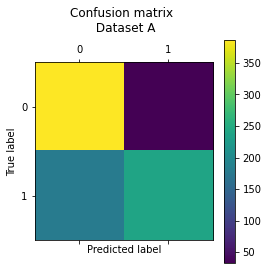

In [ ]:
#confusion matrix keseluruhan skenario
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test3, Y_pred3)
print(confusion_matrix(Y_test3, Y_pred3))
plt.matshow(cm)
plt.title('Confusion matrix \n Dataset A\n')
print()
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#MENG_ASSIGN VARIABEL FITUR DAN KELAS
features3 = list(skenario_3[1:])
class_names = ["Bawang Putih", "Non Bawang Putih"]
#K Fold pada random forest
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
import graphviz
from graphviz import Source
from sklearn import tree


start = time.time()
array_best_parameter = []
metrics3 = []
model3 = []
train3 = []
test3 = []
pred3 = []
x = skenario_3
y = Class_3
cv = StratifiedKFold(n_splits=10, random_state=123, shuffle=False)


for idx,(train_index, test_index) in enumerate(cv.split(x, y)):
    X_tr, X_te, y_tr, y_te = x.iloc[train_index,:], x.iloc[test_index,:], y.iloc[train_index], y.iloc[test_index]
    #Membuat model per fold (kalo cv=10 lama banget)
    model_dt = optimised_random3
    model_dt.fit(X_tr,y_tr)
    y_pred = model_dt.predict(X_te)
    #Mendapatkan kombinasi data train&test masing-masing fold
    train3.append([X_tr, y_tr])
    test3.append([X_te, y_te])
    pred3.append(y_pred)
    #Mengevaluasi model DT perfold
    f1 =f1_score(y_te,y_pred,pos_label = 0)
    accu = model_dt.score(X_te,y_te)
    kappa = cohen_kappa_score(y_pred, y_te, weights='quadratic')
    prec = (precision_score(y_te,y_pred,pos_label=0))
    rec = (recall_score(y_te,y_pred,pos_label=0))
    metrics3.append([prec,rec,f1,roc_auc_score(y_te,y_pred), accu, kappa])
    dot_data = StringIO()
    #tree.export_graphviz(model_dt, out_file=dot_data,  
    #                    feature_names=features3, class_names=class_names)
    #model3.append(dot_data)
   

metrics3_df = pd.DataFrame(metrics3,columns =["Precision","Recall","F1-Score","ROC-AUC","Accuracy", "kappa"])
elapsed_time = (time.time() - start)
elapsed_time
print("Waktu Training random forest:{} detik".format(elapsed_time))

In [ ]:
#EVALUASI 10 MODEL HASIL K-FOLD {AKURASI & KAPPA}

p = metrics3_df.mean()
rataan = pd.DataFrame(p, columns = ['Rataan'])
rataan = rataan.transpose()
evaluasi = metrics3_df.append(rataan)
evaluasi

,Precision,Recall,F1-Score,ROC-AUC,Accuracy,kappa
0,0.848580,0.640476,0.729986,0.763095,0.763095,0.526190
1,0.873754,0.626190,0.729542,0.767857,0.767857,0.535714
2,0.865979,0.600000,0.708861,0.753571,0.753571,0.507143
3,0.866873,0.666667,0.753701,0.782143,0.782143,0.564286
4,0.883721,0.633333,0.737864,0.775000,0.775000,0.550000
5,0.887417,0.638095,0.742382,0.778571,0.778571,0.557143
6,0.863192,0.630952,0.729023,0.765476,0.765476,0.530952
7,0.866894,0.604762,0.712482,0.755952,0.755952,0.511905
8,0.819620,0.616667,0.703804,0.740476,0.740476,0.480952
9,0.870861,0.626190,0.728532,0.766667,0.766667,0.533333


**PERBANDINGAN ATRIBUT PER SKENARIO**

In [ ]:
print(dict(zip(skenario_1.columns, optimised_random.feature_importances_)))

{'VH': 0.3879532287538812, 'VV': 0.6120467712461188}


In [ ]:
print(dict(zip(skenario_2.columns, optimised_random2.feature_importances_)))

{'VH': 0.3567250734401115, 'VV': 0.5285134536651007, 'VV-VH': 0.1147614728947878}


In [ ]:
print(dict(zip(skenario_3.columns, optimised_random3.feature_importances_)))

{'VH': 0.10473237192736616, 'VV': 0.3443253321454686, 'VV-VH': 0.019292176860732552, 'VV/VH': 0.15288431977318587, '(VV+VH)/2': 0.37876579929324683}


**CONFUSION MATRIX PER FOLD**

In [ ]:
## Confusion matrix per fold

import numpy as np

## FUNGSI PLOT CONFUSION MATRIX
## Credit to: George Fisher (https://www.kaggle.com/grfiv4/plot-a-confusion-matrix)

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=14)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=12)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",fontsize=12)


    plt.tight_layout()
    plt.ylabel('True label',fontsize=12)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass),fontsize=12)
    plt.show()
    ##CONFUSION MATRIX

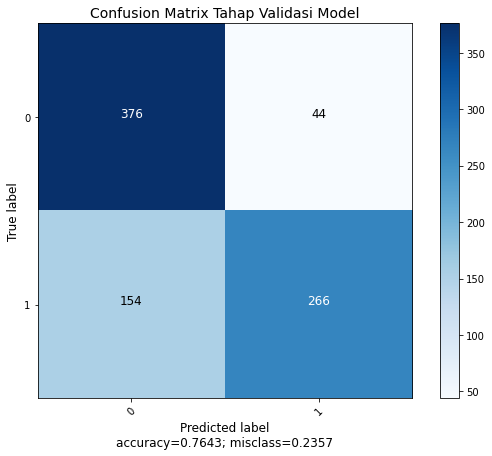

In [ ]:
## visualisasi Confusion matrix per fold
#Bawang putih=0, Non Bawang putih=1

n=0 #n diisi dengan fold
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test[n][1], pred[n])

plot_confusion_matrix(cm           = cm,
                      normalize    = False,
                      target_names = ['0','1'],
                      title        = "Confusion Matrix Tahap Validasi Model")

**IMPLEMENTASI KESELURUHAN MODEL(kurang lebih 84000 DATA)**

In [ ]:
## Implementasi model ke keseluruhan dataset

#read file total
dataset_total = pd.read_csv('22_Nov.csv')

dataset_total.columns = ['Longitude', 'Latitude', 'VH', 'VV']
datamodel = dataset_total.drop(['Longitude','Latitude'], axis = 1)


In [ ]:
datamodel

In [ ]:
  model_dt = optimised_random
  model_dt.fit(X_tr,y_tr)
  y_pred = model_dt.predict(datamodel)

In [ ]:
dataset_total['Class']= y_pred

In [ ]:
dataset_total

,Longitude,Latitude,VH,VV,Class
0,1.777225e+06,9.056082e+06,-17.219891,-7.997727,0.0
1,1.777235e+06,9.056082e+06,-16.711527,-8.185431,0.0
2,1.777245e+06,9.056082e+06,-16.408459,-8.642118,1.0
3,1.777255e+06,9.056082e+06,-15.910982,-8.490516,0.0
4,1.777265e+06,9.056082e+06,-15.170050,-8.446631,0.0
...,...,...,...,...,...
84235,1.780415e+06,9.053492e+06,-15.017966,-10.045405,0.0
84236,1.780425e+06,9.053492e+06,-15.392566,-9.996421,0.0
84237,1.780435e+06,9.053492e+06,-15.742068,-9.220573,0.0
84238,1.780445e+06,9.053492e+06,-15.327689,-7.573978,0.0


In [ ]:
dataset_total.to_csv(r'hasil_prediksi_22Nov.csv')

